In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df.shape

(48842, 15)

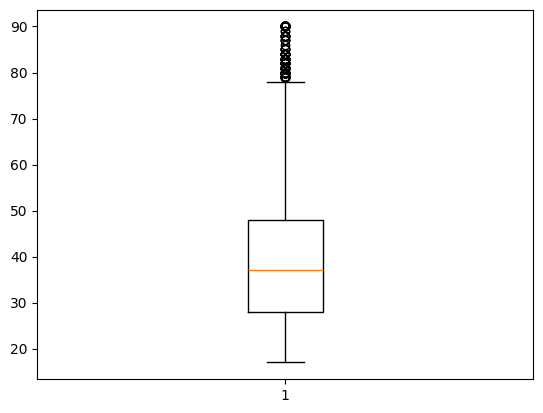

In [4]:
plt.boxplot(df['age'])
plt.show()

In [5]:
df = df[(df['age']<=65) & (df['age']>=17)]

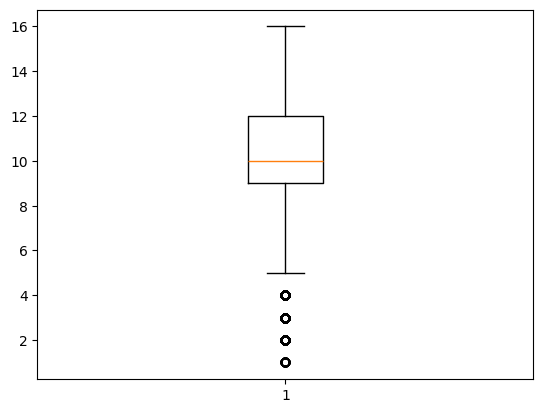

In [6]:
plt.boxplot(df['educational-num'])
plt.show()

In [7]:
df = df[(df['educational-num']<=16) & (df['educational-num']>=5)]

In [8]:
df['experience'] = df['age'] - df['educational-num'] - 6

In [9]:
df.columns.tolist()        

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'experience']

In [10]:
cols = df.columns.tolist()[:-1]
cols.insert(1,'experience')
df = df[cols]
df.columns.tolist()

['age',
 'experience',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [11]:
for col in df.columns:
    if col not in df.select_dtypes(['number']).columns:
        print(df[col].value_counts())
        print('\n')

workclass
Private             31962
Self-emp-not-inc     3393
Local-gov            2983
?                    2253
State-gov            1919
Self-emp-inc         1547
Federal-gov          1401
Without-pay            16
Never-worked            9
Name: count, dtype: int64


education
HS-grad         15194
Some-college    10603
Bachelors        7804
Masters          2565
Assoc-voc        2006
11th             1756
Assoc-acdm       1570
10th             1307
Prof-school       779
9th               705
12th              644
Doctorate         550
Name: count, dtype: int64


marital-status
Married-civ-spouse       20535
Never-married            15641
Divorced                  6344
Separated                 1431
Widowed                    957
Married-spouse-absent      539
Married-AF-spouse           36
Name: count, dtype: int64


occupation
Prof-specialty       5973
Exec-managerial      5846
Craft-repair         5768
Adm-clerical         5421
Sales                5238
Other-service        4473

In [12]:
for col in ['workclass','native-country','occupation']:
    df[col].replace({'?':'Others'},inplace=True)

C:\Users\Harish\AppData\Local\Temp\ipykernel_12088\2905010921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'?':'Others'},inplace=True)


In [13]:
df = df[df['workclass']!='Without-pay']
df = df[df['workclass']!='Never-worked']
df = df[df['education']!='Preschool']
df = df[df['education']!='1st-4th']
df = df[df['education']!='5th-6th']
df.shape

(45458, 16)

In [ ]:
df.drop(columns=['education'],inplace=True)       
df.drop(columns=['fnlwgt'],inplace=True)     

In [15]:
df.to_csv("Employee_details.csv")

In [16]:
categorical_cols = ['workclass','marital-status','occupation','relationship','race','gender','native-country','income']

label_encoders = {}

for col in categorical_cols:
    lben = LabelEncoder()
    df[col] = lben.fit_transform(df[col])
    label_encoders[col] = lben

df

,age,experience,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,12,3,7,4,6,3,2,1,0,0,40,39,0
1,38,23,3,9,2,4,0,4,1,0,0,50,39,0
2,28,10,1,12,2,11,0,4,1,0,0,40,39,1
3,44,28,3,10,2,6,0,2,1,7688,0,40,39,1
4,18,2,2,10,4,8,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,9,3,12,2,13,5,4,0,0,0,38,39,0
48838,40,25,3,9,2,6,0,4,1,0,0,40,39,1
48839,58,43,3,9,6,0,4,4,0,0,0,40,39,0
48840,22,7,3,9,4,0,3,4,1,0,0,20,39,0


In [17]:
x = df.iloc[:,:-1]
y = df['income']

In [18]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.16666667, 0.25      , 0.5       , ..., 0.        , 0.39795918,
        0.95121951],
       [0.4375    , 0.44642857, 0.5       , ..., 0.        , 0.5       ,
        0.95121951],
       [0.22916667, 0.21428571, 0.16666667, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.85416667, 0.80357143, 0.5       , ..., 0.        , 0.39795918,
        0.95121951],
       [0.10416667, 0.16071429, 0.5       , ..., 0.        , 0.19387755,
        0.95121951],
       [0.72916667, 0.69642857, 0.66666667, ..., 0.        , 0.39795918,
        0.95121951]])

In [19]:
with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)
xtrain

array([[0.1875    , 0.16071429, 0.5       , ..., 0.        , 0.41836735,
        0.95121951],
       [0.08333333, 0.125     , 1.        , ..., 0.        , 0.07142857,
        0.95121951],
       [0.83333333, 0.76785714, 0.33333333, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.6875    , 0.66071429, 0.5       , ..., 0.        , 0.60204082,
        0.95121951],
       [0.60416667, 0.57142857, 0.66666667, ..., 0.        , 0.39795918,
        0.95121951],
       [1.        , 0.83928571, 0.5       , ..., 0.        , 0.5       ,
        0.95121951]])

In [21]:
model = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth=6,
    eval_metric= 'logloss',
    random_state=42
)
model.fit(xtrain,ytrain)
predictxg = model.predict(xtest)
print('Accuracy of XGBoost: ',accuracy_score(ytest,predictxg))

Accuracy of XGBoost:  0.8697756269247691


In [22]:
import joblib 

joblib.dump(model,"optimal_model.pkl")

['optimal_model.pkl']

In [23]:
model.get_booster().feature_names = df.columns[:-1].tolist()

<Figure size 1000x600 with 0 Axes>

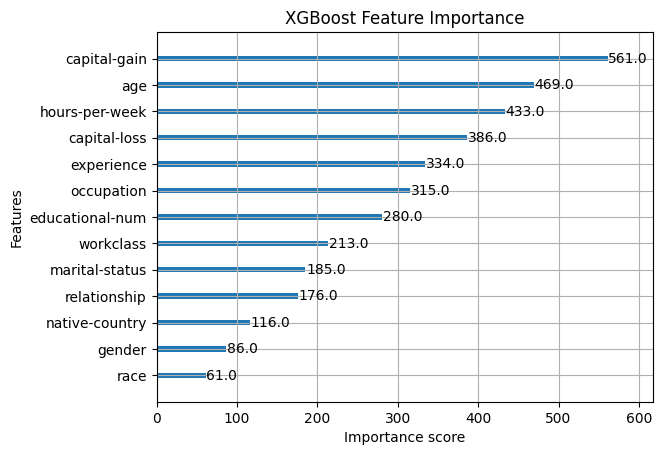

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(model,max_num_features=13)
plt.title("XGBoost Feature Importance")              
plt.show()